In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from models.gp_classification import *
from utils.utils import *

Here, we visualise the output of gaussian processes for classification. 
We generate data consisting of two classes with the same population size (N1=N2=50), where 
sigma = 0.1, mean1 = [2,2], mean2= [3,3]:

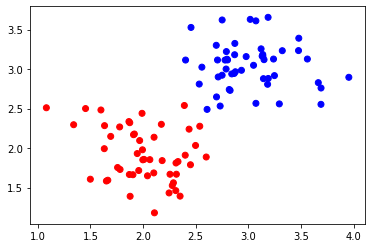

In [4]:
N1 = 50
N2 = 50
K = 2
sigma1 = 0.1
sigma2 = 0.1
mean1 = (2,2)
mean2 = (3,3)

T, X, color = generate_data(N1, N2, K, sigma1, sigma2, mean1, mean2)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color)
plt.show()

In [5]:
## append column of 1s for offset

offset_col = np.ones((len(X), 1))
X_new = np.append(offset_col, X, axis=1)

gp_classification = gp_classification_model(theta_0=1.0, theta_1=4.0, theta_2=1.0,\
                 theta_3=2.0, beta_inv=0.2)
t_vector = T[:,0]
a_init = np.array([0]*len(X))

a_bar = gp_classification.newton_raphson_update(a_init, X_new, t_vector, 100)


The estimate has converged after 100 iterations.


In [6]:
# retrieve W_matrix and C_matrix
W_matrix = gp_classification.W_matrix
C_matrix = gp_classification.C_matrix

gp_pred_batch = gp_classification.gp_prediction_by_batch(
    a_bar, C_matrix, W_matrix, X)

In [7]:
X_to_plot = np.zeros((50, 50))
yaxis_range = np.linspace(0,5, num=50)
xaxis_range = np.linspace(0,5, num=50)


for i in range(len(xaxis_range)):
    x1 = xaxis_range[i]
    for j in range(len(yaxis_range)):
        x2 = yaxis_range[j]
        X_mat_ = np.array([1, x1, x2])
        t_star_ = gp_classification.gp_prediction_individual(a_bar, C_matrix, W_matrix, X_new, X_mat_)
        
        X_to_plot[i, j] = t_star_
    

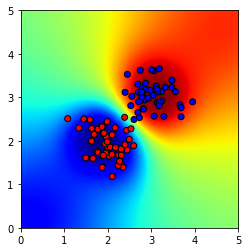

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolors='black')

#we plot 1-prob to contrast the scatterplot against the colourmap

plt.imshow(1-X_to_plot, origin='lower', 
           extent =[0,5,0,5], 
            interpolation='bilinear', cmap = 'jet')


5. Change the kernel parameters to (1.0, 0.25, 0, 0).

In [9]:
gp_classification = gp_classification_model(theta_0=1.0, theta_1=0.25, theta_2=0.0,\
                 theta_3=0.0, beta_inv=0.2)

t_vector = T[:,0]
a_init = np.array([0]*len(X))

a_bar = gp_classification.newton_raphson_update(a_init, X_new, t_vector, 100)


The estimate has converged after 100 iterations.


In [10]:
# retrieve W_matrix and C_matrix
W_matrix = gp_classification.W_matrix
C_matrix = gp_classification.C_matrix

gp_pred_batch = gp_classification.gp_prediction_by_batch(
    a_bar, C_matrix, W_matrix, X)

In [11]:
X_to_plot = np.zeros((50, 50))
yaxis_range = np.linspace(0,5, num=50)
xaxis_range = np.linspace(0,5, num=50)


for i in range(len(xaxis_range)):
    x1 = xaxis_range[i]
    for j in range(len(yaxis_range)):
        x2 = yaxis_range[j]
        X_mat_ = np.array([1, x1, x2])
        t_star_ = gp_classification.gp_prediction_individual(a_bar, C_matrix, W_matrix, X_new, X_mat_)
        
        X_to_plot[i, j] = t_star_
    

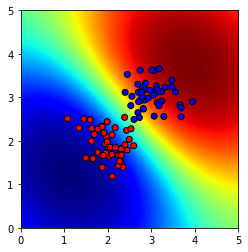

In [12]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolors='black')

#we plot 1-prob to contrast the scatterplot against the colourmap

plt.imshow(1-X_to_plot, origin='lower', 
           extent =[0,5,0,5], 
            interpolation='bilinear', cmap = 'jet')


7. Change the kernel parameters back to (1.0, 4.0, 1.0, 2.0).
8. Change the means of the clusters to mean1 = [3,3], mean2= [3.2,3.2], and cov1 = [[0.003, 0],[0.003]], cov2= [[0.3,0],[0,0.3]].

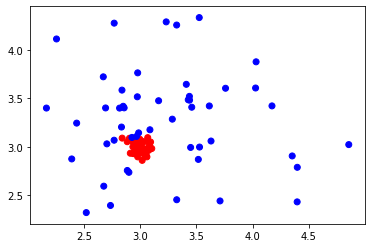

In [13]:
N1 = 50
N2 = 50
K = 2
sigma1 = 0.003
sigma2 = 0.3
mean1 = (3,3)
mean2 = (3.2,3.2)

T, X, color = generate_data(N1, N2, K, sigma1, sigma2, mean1, mean2)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color)
plt.show()

In [14]:
## append column of 1s for offset
offset_col = np.ones((len(X), 1))
X_new = np.append(offset_col, X, axis=1)

gp_classification = gp_classification_model(theta_0=1.0, theta_1=4.0, theta_2=1.0,\
                 theta_3=2.0, beta_inv=0.2)
t_vector = T[:,0]
a_init = np.array([0]*len(X))

a_bar = gp_classification.newton_raphson_update(a_init, X_new, t_vector, 100)


The estimate has converged after 100 iterations.


In [15]:
# retrieve W_matrix and C_matrix
W_matrix = gp_classification.W_matrix
C_matrix = gp_classification.C_matrix

gp_pred_batch = gp_classification.gp_prediction_by_batch(
    a_bar, C_matrix, W_matrix, X)

In [16]:
X_to_plot = np.zeros((50, 50))
yaxis_range = np.linspace(0,5, num=50)
xaxis_range = np.linspace(0,5, num=50)


for i in range(len(xaxis_range)):
    x1 = xaxis_range[i]
    for j in range(len(yaxis_range)):
        x2 = yaxis_range[j]
        X_mat_ = np.array([1, x1, x2])
        t_star_ = gp_classification.gp_prediction_individual(a_bar, C_matrix, W_matrix, X_new, X_mat_)
        
        X_to_plot[i, j] = t_star_

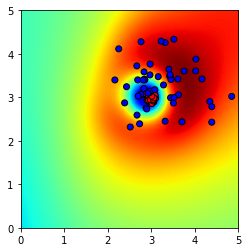

In [17]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolors='black')

#we plot 1-prob to contrast the scatterplot against the colourmap

plt.imshow(1-X_to_plot, origin='lower', 
           extent =[0,5,0,5], 
            interpolation='bilinear', cmap = 'jet')
